In [1]:
library(lattice) # needed for LD-plots

In [ ]:
# Load in the Ne and Nc estimates

In [28]:
Ne = read.table("./work/Ne_estimates.txt",sep = '\t', header = TRUE)
Nc = read.table("./data/Nc_estimates.txt",sep = '\t', header = TRUE)

In [84]:
Ne

Pop,Site,Lineage,Ne_est
Nome_ODD,Nome,ODD,2014.426
Nome_EVEN,Nome,EVEN,3691.296
Koppen_ODD,Koppen,ODD,2079.581
Koppen_EVEN,Koppen,EVEN,9087.463
Puget_ODD,Puget,ODD,2934.276
Puget_EVEN,Puget,EVEN,1805.562


In [85]:
Nc

Pop,Site,Lineage,Nc_est
Nome_ODD,Nome,ODD,300000
Nome_EVEN,Nome,EVEN,10000
Koppen_ODD,Koppen,ODD,200000
Koppen_EVEN,Koppen,EVEN,200000
Puget_ODD,Puget,ODD,1400000
Puget_EVEN,Puget,EVEN,4000


In [86]:
## Use the merge command to join them

In [29]:
estimates = merge(Ne, Nc)
estimates

Pop,Site,Lineage,Ne_est,Nc_est
Koppen_EVEN,Koppen,EVEN,9087.463,200000
Koppen_ODD,Koppen,ODD,2079.581,200000
Nome_EVEN,Nome,EVEN,3691.296,10000
Nome_ODD,Nome,ODD,2014.426,300000
Puget_EVEN,Puget,EVEN,1805.562,4000
Puget_ODD,Puget,ODD,2934.276,1400000


In [73]:
estimates$ratio = estimates$Ne_est / estimates$Nc_est
# reorder to match input order
estimates$Pop <- factor(estimates$Pop , levels =c('Nome_ODD','Nome_EVEN', 'Koppen_ODD', 'Koppen_EVEN', 'Puget_ODD', 'Puget_EVEN'))
estimates = estimates[order(estimates$Pop),]
estimates

,Pop,Site,Lineage,Ne_est,Nc_est,ratio
4,Nome_ODD,Nome,ODD,2014.426,300000,0.006714752
3,Nome_EVEN,Nome,EVEN,3691.296,10000,0.369129596
2,Koppen_ODD,Koppen,ODD,2079.581,200000,0.010397905
1,Koppen_EVEN,Koppen,EVEN,9087.463,200000,0.045437316
6,Puget_ODD,Puget,ODD,2934.276,1400000,0.002095911
5,Puget_EVEN,Puget,EVEN,1805.562,4000,0.451390566


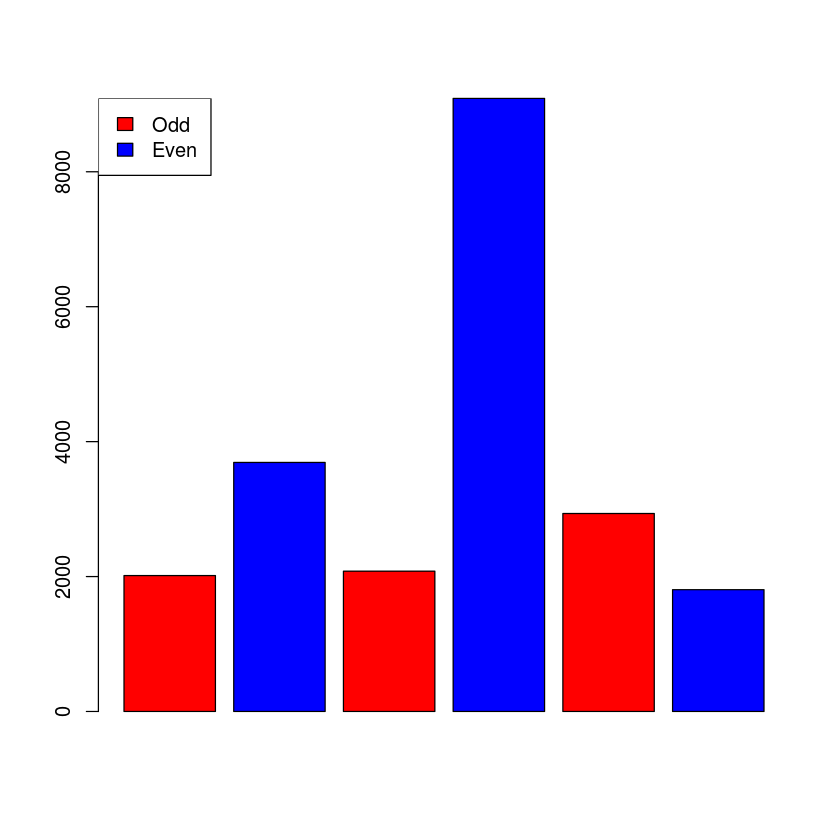

In [92]:
barplot(estimates$Ne_est, col = c("red","blue"))
legend("topleft",
  c("Odd","Even"),
  fill = c("red","blue")
)

In [91]:
trellis.device(device="png", filename="./plots/Barplot.test.png")

barplot(estimates$Ne_est, col = c("red","blue"))
legend("topleft",
  c("Odd","Even"),
  fill = c("red","blue")
)

dev.off()

png 
  2

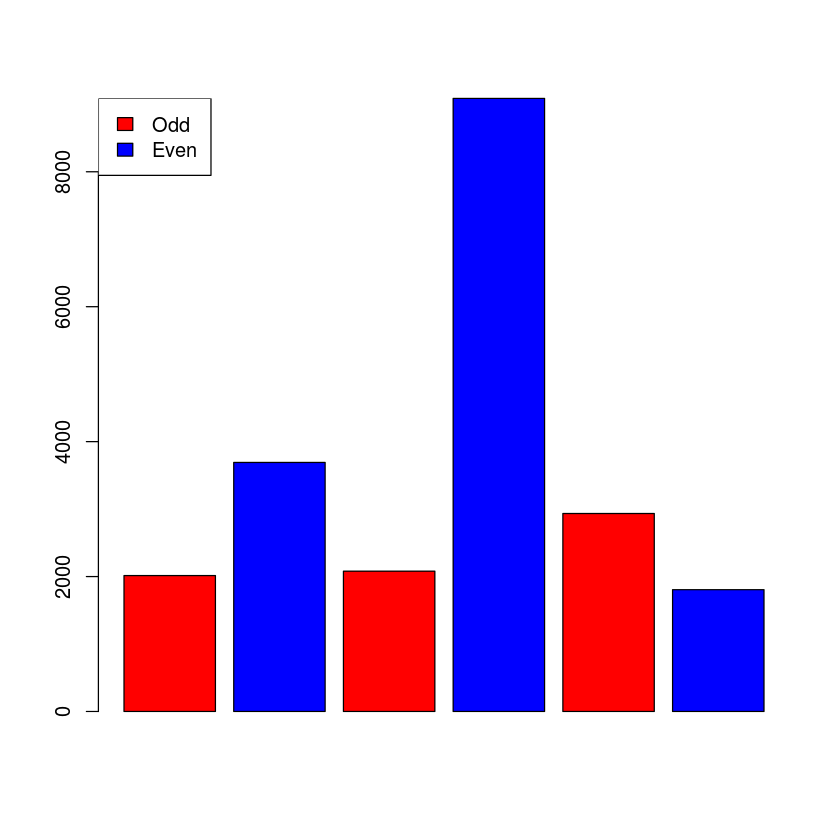

In [88]:
p1 = barplot(estimates$Ne_est, col = c("red","blue"))
legend("topleft",
  c("Odd","Even"),
  fill = c("red","blue")
)

In [89]:
p1

0.7
1.9
3.1
4.3
5.5
6.7


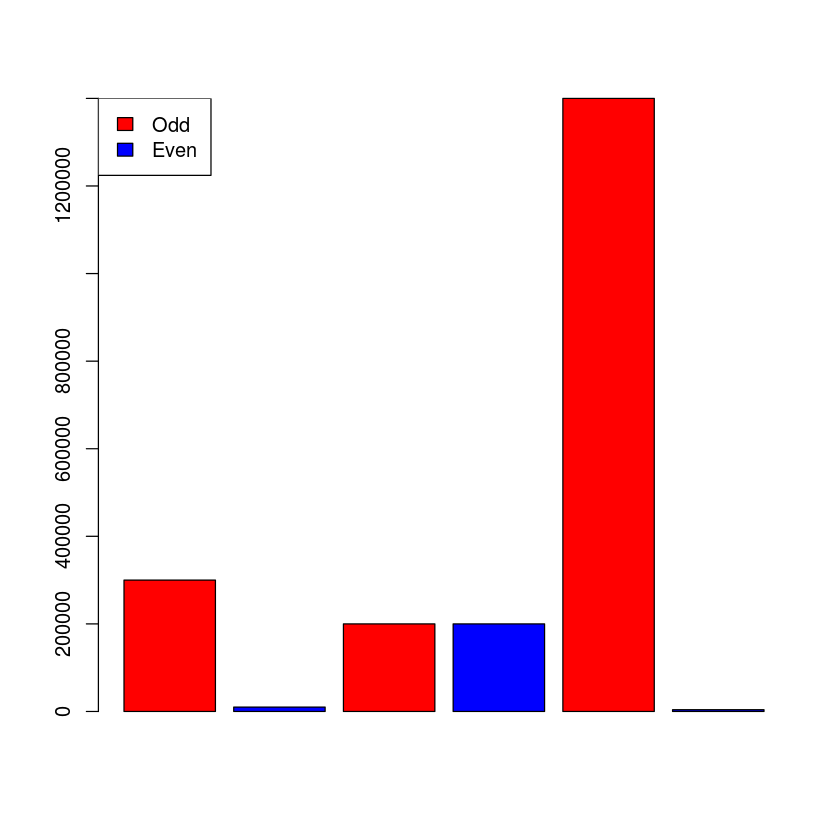

In [78]:
barplot(estimates$Nc_est, col = c("red","blue"))
legend("topleft",
  c("Odd","Even"),
  fill = c("red","blue")
)

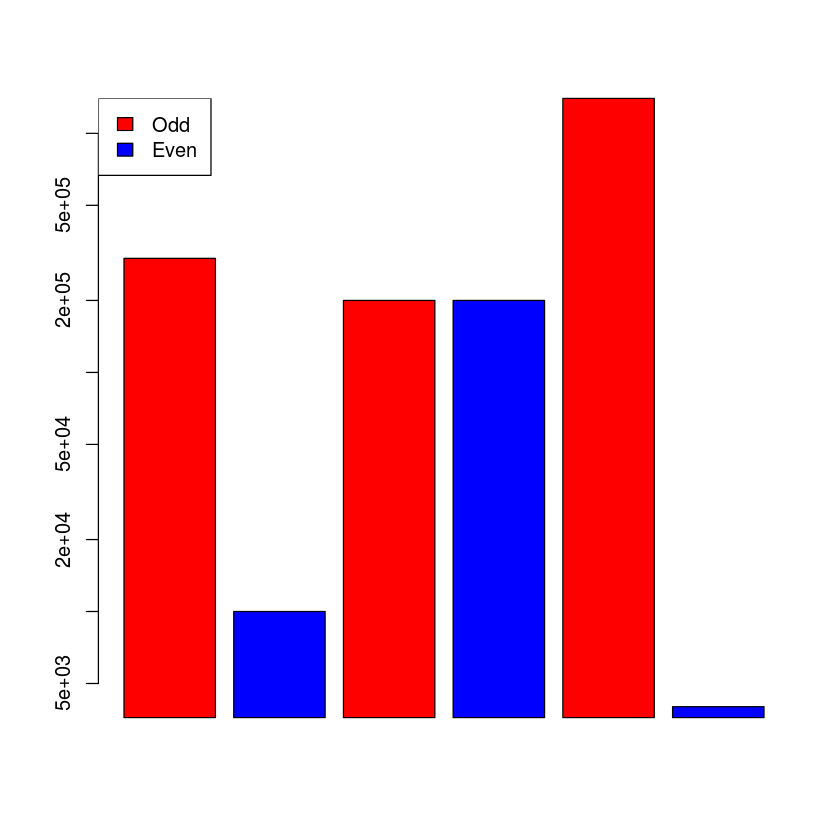

In [77]:
barplot(estimates$Nc_est, col = c("red","blue"), log = "y")
legend("topleft",
  c("Odd","Even"),
  fill = c("red","blue")
)

In [79]:
for_barplot = data.matrix(t(estimates[,c('Ne_est', 'Nc_est')]))
colnames(for_barplot) = estimates$Pop
for_barplot

,Nome_ODD,Nome_EVEN,Koppen_ODD,Koppen_EVEN,Puget_ODD,Puget_EVEN
Ne_est,2014.426,3691.296,2079.581,9087.463,2934.276,1805.562
Nc_est,300000.000,10000.000,200000.000,200000.000,1400000.000,4000.000


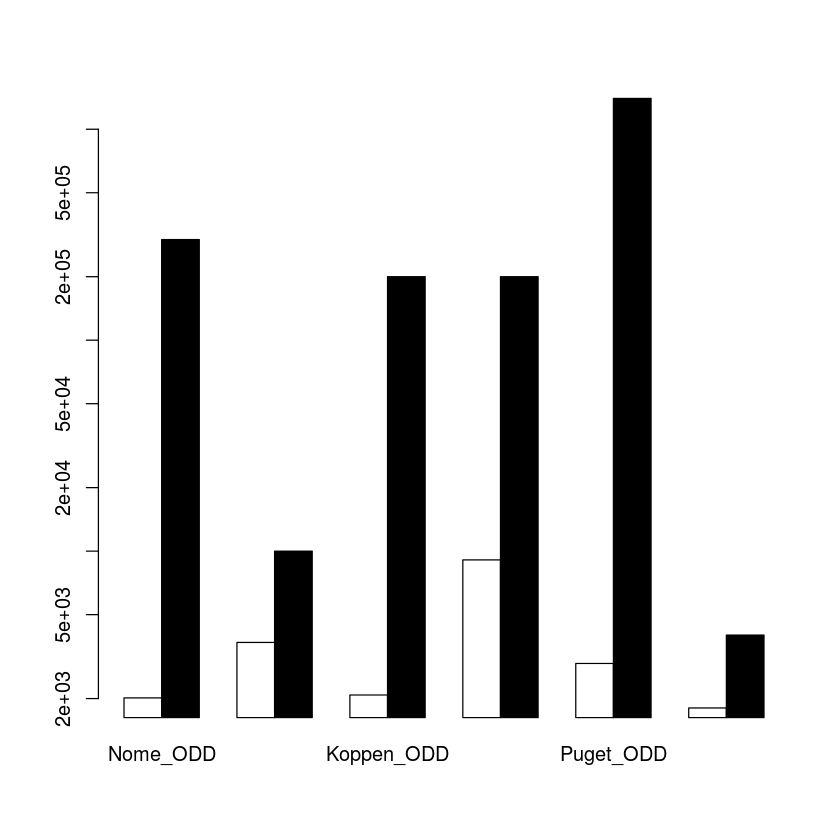

In [83]:
barplot(for_barplot,  col = c("white","black"), beside = TRUE, log = 'y')

# How to plot an r2_matrix

In [2]:
source('./scripts/R_functions.r')

In [3]:
my_Ne = get_Ne('./work/Nome_ODD')

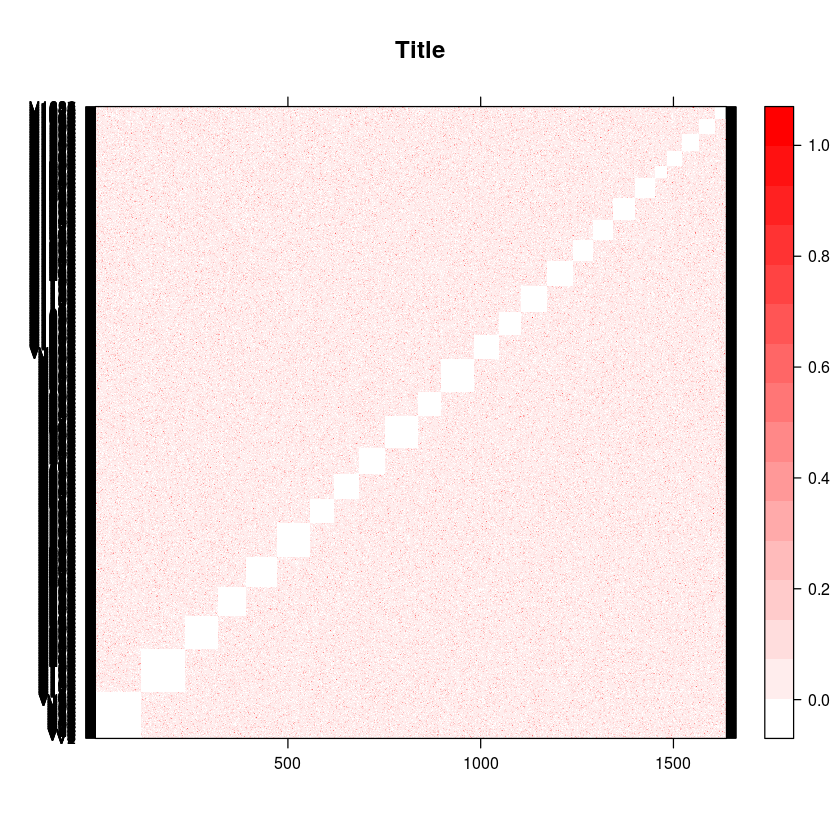

In [6]:
pal <- colorRampPalette(c("white", "red"), space = "rgb")
lp1 = levelplot(my_Ne$r2_matrix, main="Title", xlab="", ylab="", 
          col.regions=pal(1000), 
          #cuts=1000, 
          #at=seq(0,1,0.001),
          useRaster = FALSE)

lp1

In [ ]:
trellis.device(device="png", filename="./plots/Puget_EVEN.ld.png")
print(lp1)
dev.off()
trellis.device(device="png", filename="./plots/Puget_EVEN.raw.ld.png")
print(lp2)
dev.off()